In [1]:
#libraries used in this notebook
import math 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
#change working directory
os.chdir('/Users/carlos_lopez/MATH336/')

# 2. Buffon's Needle Problem

## 2. c). Monte Carlo Simulation

In [5]:
from numpy import random as rando

N = 500_000 #number of experiments/samples
d = 8.1 #inches
l = 6.3 #inches

#generate needle endpoints distances for y∈[0,d] 
ys = rando.uniform(low=0, high=d, size=(N,1))
#generate needle angles for θ∈[-π/2,π/2]
thetas = rando.uniform(low=-np.pi/2, high=np.pi/2, size=(N,1))
#calculate the sum of the y's and θy (θ vertical component)
# to find where each needle lies
res = ys + l*np.cos(thetas)
#find number of times crossing condition was met: y+lcosθ≥d
k = len(np.where(res >= d)[0])

print(f"Monte Carlo simulation approximation of probability: {round(k/N, 6)}")
print(f"Formula result of needle crossing probability: {round((2*l)/(np.pi*d), 6)}")

Monte Carlo simulation approximation of probability: 0.495294
Formula result of needle crossing probability: 0.495149


# 3. SVD Analysis

## 3. b). Find original matrix A

In [8]:
U = np.array([[-0.35, 0.94],[ 0.94, 0.35]])
D = np.array([5.71, 3.37])
#np.array([[5.71, 0], [0, 3.37]])
V = np.array([[ 0.04, 0.66], [ 0.55, 0.04],
              [ 0.66, 0.42], [-0.51, 0.62]])
Vt = V.transpose()
print(U.shape, D.shape, V.shape, Vt.shape)
#print("U=", U)
#print("D=", D)
#print("Vt=", Vt)

A = np.dot(U*D, Vt)
print("A =", end="")
for i in np.round(A,2):
    print("\t", i)

print("\nAnother method of reconstruction:")

A = np.dot(U, np.dot(np.diag(D), Vt))
print("A =", end="")
for i in np.round(A,2):
    print("\t", i)

(2, 2) (2,) (4, 2) (2, 4)
A =	 [ 2.01 -0.97  0.01  2.98]
	 [ 0.99  3.    4.04 -2.01]

Another method of reconstruction:
A =	 [ 2.01 -0.97  0.01  2.98]
	 [ 0.99  3.    4.04 -2.01]


In [9]:
#Verify results above by rounding to nearest integer
A = np.array([[2,-1,0,3],[1,3,4,-2]])
Us, S, Vh = np.linalg.svd(A, full_matrices=False)
U = np.round(Us, 2)
d = np.round(S, 2)
V = np.round(Vh.transpose(), 2)
print("U=", U)
print("d=", d)
print("V=", V)

U= [[-0.35  0.94]
 [ 0.94  0.35]]
d= [5.71 3.37]
V= [[ 0.04  0.66]
 [ 0.55  0.04]
 [ 0.66  0.42]
 [-0.51  0.62]]


# 4. Fluid mixing problem

## 4. b). Solve the time needed to reduce salt concentration

In [45]:
#formula for t as a function of x
t = lambda x: -8*np.log((x-8)/32)
#salt concentration that is 50% of the initial 40
x = 20
#print result of time function with salt concentration input
print(f"Time taken to reduce salt concentration by 50% is: {round(t(x),6)} minutes")

Time taken to reduce salt concentration by 50% is: 7.846634 minutes


## 4. c). Changing the out-flow rate

In [48]:
#new derived formula for t as a function of x with different out-flow rate
t = lambda x: (-80/9.5)*np.log((9.5*x-80)/300)
#input salt concentration that is 50% of the initial 40
x = 20
#print result of time function with salt concentration input
print(f"Time taken to reduce salt concentration by 50% is: {round(t(x),6)} minutes")

Time taken to reduce salt concentration by 50% is: 8.44886 minutes


# 5. Python Programming

## 5. i). Solve System of Linear Equations

In [12]:
A = np.array([ 
    [-3, 2, 1, -1, 2.1, 1],
    [-1.5, -5.5, 1, 0, -1.9, -0.5],
    [1.5, -3.5, -6, -3, 0, -1],
    [-1.8, -1, -5.1, -3.4, 0, -1.4],
    [2, 5.6, 2, -2, 8.1, -1],
    [1, 0, -1, 0, 2.1, 1]
])
b = np.array([0.2, 1.3, 0, 4.1, -3.2, 2.1])
#print(A.shape, b.shape)

x = np.linalg.solve(A, b)
for i in range(len(x)):
    print(f"x{i+1}: {round(x[i],6)}")

x1: -2.819787
x2: -0.571928
x3: -2.917323
x4: 6.200646
x5: 2.537331
x6: -3.325931


## 5. ii). Monte Carlo Simulation of 6-D ball volume

In [14]:
# Monte Carlo simulation for 6-dimensional ball volume
R = 3 #radius of ball
N = 600_000 #sample size
n = 6 #number of dimensions
#generate N random points in n-dimensional space between -R and R
points = np.random.uniform(-R, R, size=(N, n))
#compute the squared distance of each point from the origin
squared_distances = np.sum(points**2, axis=1)
#count the points that lie within the ball
inside_ball = np.sum(squared_distances <= R**2)
#volume of the enclosing hypercube
hypercube_volume = (2 * R)**n
#estimate the volume of the ball
ball_volume = hypercube_volume * (inside_ball / N)
print(f"Estimated volume: {round(ball_volume,6)}")
exact_volume = (np.pi**3)*(R**6)/6
print(f"Actual volume from formula: {round(exact_volume,6)}")

Estimated volume: 3778.90272
Actual volume from formula: 3767.262617


## 5. iii). Monte Carlo approximation of integral

In [16]:
#Monte Carlo approximation of integral using 100,000 points

#Define the function inside the integral
f = lambda x: (1+np.sin(1+x**4))/((1+x**2)*(2+np.cos(x)**2))

N = 100_000 #number of points
a = 1 #lower limit of integral bounds
b = 4 #upper limit of integral bounds

#generate N points between a and b
points = np.random.uniform(a, b, size=(N, 1))

integral = 0.0
for p in points:
    integral += f(p)

res = (b-a)/float(N)*integral[0]
print(f"Estimated Monte Carlo approximation of integral: {round(res,5)}")

Estimated Monte Carlo approximation of integral: 0.23926


## 5. iv). Global average temperature anomaly plotting

In [18]:
#read dataset file from file path
file_path = 'data/EarthTemperatureData.csv'
df = pd.read_csv(file_path, header=0, index_col=0)
print(df.shape)
print(df.head(5))

(166, 13)
        JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
YEAR                                                                         
1850 -0.702 -0.284 -0.732 -0.570 -0.325 -0.213 -0.128 -0.233 -0.444 -0.452   
1851 -0.303 -0.362 -0.485 -0.445 -0.302 -0.189 -0.215 -0.153 -0.108 -0.063   
1852 -0.308 -0.477 -0.505 -0.559 -0.209 -0.038 -0.016 -0.195 -0.125 -0.216   
1853 -0.177 -0.330 -0.318 -0.352 -0.268 -0.179 -0.059 -0.148 -0.409 -0.359   
1854 -0.360 -0.280 -0.284 -0.349 -0.230 -0.215 -0.228 -0.163 -0.115 -0.188   

        NOV    DEC  ANNUAL  
YEAR                        
1850 -0.190 -0.268  -0.375  
1851 -0.030 -0.067  -0.223  
1852 -0.187  0.083  -0.224  
1853 -0.256 -0.444  -0.271  
1854 -0.369 -0.232  -0.246  


In [19]:
#extract October data from dataframe
octData = np.array(df.loc['1850':'2015','OCT'])
octData

array([-0.452, -0.063, -0.216, -0.359, -0.188, -0.211, -0.384, -0.467,
       -0.2  , -0.255, -0.198, -0.355, -0.42 , -0.381, -0.701, -0.272,
       -0.417, -0.179, -0.232, -0.422, -0.393, -0.479, -0.225, -0.402,
       -0.436, -0.371, -0.385,  0.055, -0.12 , -0.121, -0.387, -0.284,
       -0.337, -0.381, -0.322, -0.249, -0.363, -0.506, -0.106, -0.299,
       -0.504, -0.332, -0.444, -0.271, -0.443, -0.343, -0.13 , -0.262,
       -0.561, -0.189, -0.06 , -0.298, -0.486, -0.658, -0.48 , -0.37 ,
       -0.353, -0.359, -0.586, -0.48 , -0.484, -0.465, -0.643, -0.429,
       -0.153, -0.259, -0.403, -0.39 , -0.098, -0.305, -0.224, -0.139,
       -0.322, -0.264, -0.313, -0.305, -0.085, -0.04 , -0.169, -0.18 ,
       -0.093, -0.04 , -0.172, -0.198, -0.084, -0.076, -0.003,  0.121,
        0.147, -0.273,  0.013,  0.219, -0.076,  0.237,  0.212,  0.185,
       -0.048,  0.077,  0.031, -0.032, -0.125,  0.129, -0.009,  0.073,
       -0.036, -0.164, -0.23 , -0.013,  0.015, -0.035, -0.027, -0.031,
      

Linear trend = 0.006 deg C/year


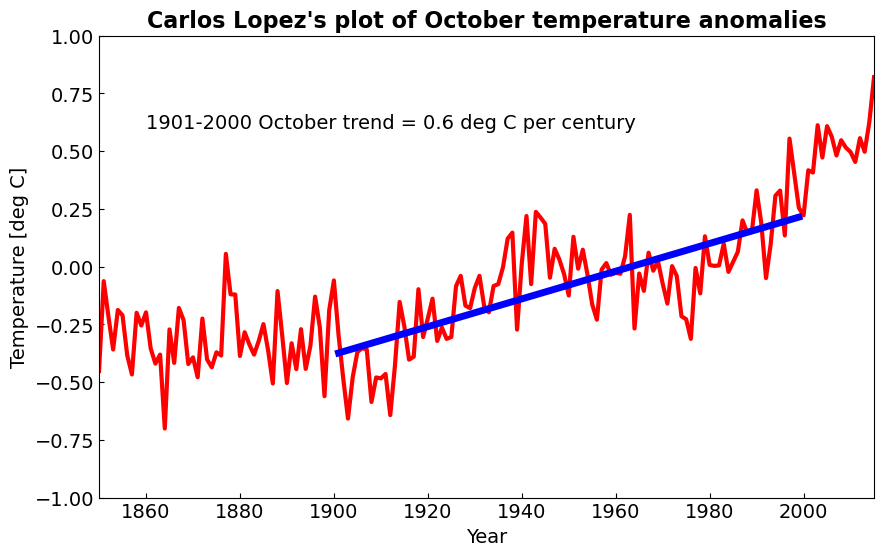

<Figure size 640x480 with 0 Axes>

In [37]:
years = np.arange(1850, 2016)

plt.figure(figsize=(10,6))
#(b) make curve red and use linewidth 3
plt.plot(years, octData.astype(float), color='red', linewidth=3)
plt.xlabel('Year', size = 14)
plt.ylabel('Temperature [deg C]', size = 14)
#(a) Change title to my name and October
plt.title("Carlos Lopez's plot of October temperature anomalies", 
          size = 16, fontweight="bold")
plt.tick_params(direction='in',labelsize=14)
plt.xlim([1850, 2015])
plt.ylim([-1, 1])

#(c) compute the linear trend for the period from 1901 to 2000
octperiod = octData[51:150]
period = np.arange(1901, 2000)
temTrend = np.polyfit(period, octperiod.astype(float), 1)
print("Linear trend =", round(temTrend[0], 6), "deg C/year")
#(d) plot the trend line from 1901-2000 in blue and linewidth=5
plt.plot(period, temTrend[1] + temTrend[0]*period, 'blue', linewidth=5)
#(e) plot text for 1901-200 October trend
plt.text(1860, 0.60, "1901-2000 October trend = 0.6 deg C per century", size = 14)
plt.show()
#(f) save plot as a png file
plt.savefig('OctoberTempAnomalies.png')

In [21]:
#(g) Find hottest and coldest October temp anomalies and the years they occured in
hottest = np.max(octData)
hotyear = np.argmax(octData) + 1850
coldest = np.min(octData)
coldyear = np.argmin(octData) + 1850

print(f"The hottest October temp anomaly was {hottest} deg C, which occured in {hotyear}")
print(f"The coldest October temp anomaly was {coldest} deg C, which occured in {coldyear}")

The hottest October temp anomaly was 0.82 deg C, which occured in 2015
The coldest October temp anomaly was -0.701 deg C, which occured in 1864
